In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_excel(r"C:\Users\Santosh\Desktop\MSP.xlsx")
print(df.head(4))

            Name   Day Status InTime OutTime  Total     Hours Month       Date
0  Ratheesh Tech  1 Th      A    NaN     NaN  00:00       NaN   Nov 2018-11-01
1  Ratheesh Tech   2 F      P  10:18   10:31  00:13  0.216667   Nov 2018-11-02
2  Ratheesh Tech  3 St      A    NaN     NaN  00:00       NaN   Nov 2018-11-03
3  Ratheesh Tech   4 S      A    NaN     NaN  00:00       NaN   Nov 2018-11-04


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 9 columns):
Name       11430 non-null object
Day        11430 non-null object
Status     11430 non-null object
InTime     4615 non-null object
OutTime    4296 non-null object
Total      11430 non-null object
Hours      4615 non-null float64
Month      11430 non-null object
Date       11430 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 803.8+ KB


In [17]:
df.describe()

,Hours
count,4615.000000
mean,8.410679
std,2.577402
min,0.116667
25%,7.866667
50%,8.883333
75%,9.366667
max,23.783333


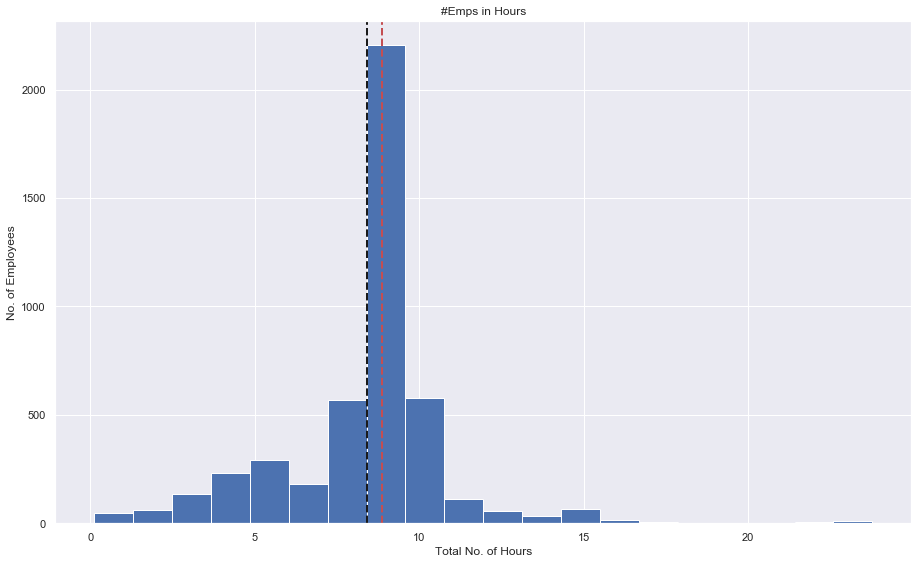

In [24]:
# Plot the histogram of all months for hours, cumulatively to analyse the distribution.
sns.set()
plt.figure(figsize=(13,8))
x = df['Hours'].dropna(how='any')
plt.hist(x, bins=20)
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=2)
plt.axvline(x.median(), color='r', linestyle='dashed', linewidth=2)
plt.xlabel('Total No. of Hours')
plt.ylabel('No. of Employees')
plt.title('#Emps in Hours')
plt.tight_layout()
plt.show()

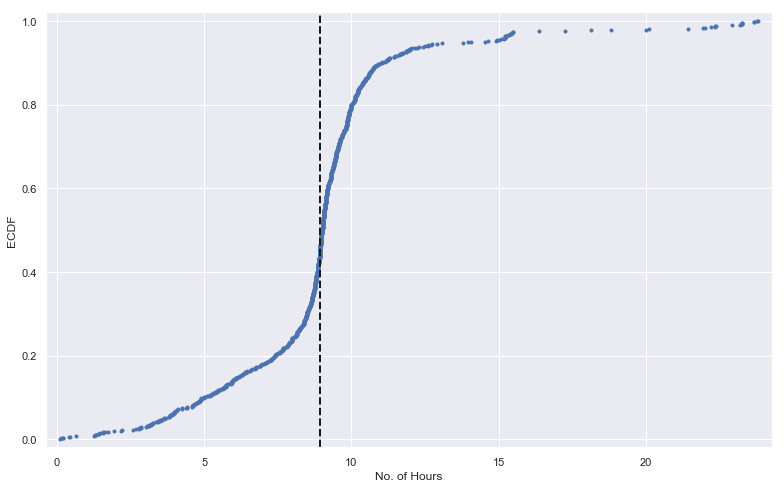

In [28]:
plt.figure(figsize=(13,8))
x = np.sort(November['Hours'].dropna(how='any'))
y = np.arange(1, len(x)+1) / len(x)
plt.plot(x, y, marker='.', linestyle='none')
plt.axvline(x.mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlabel('No. of Hours')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

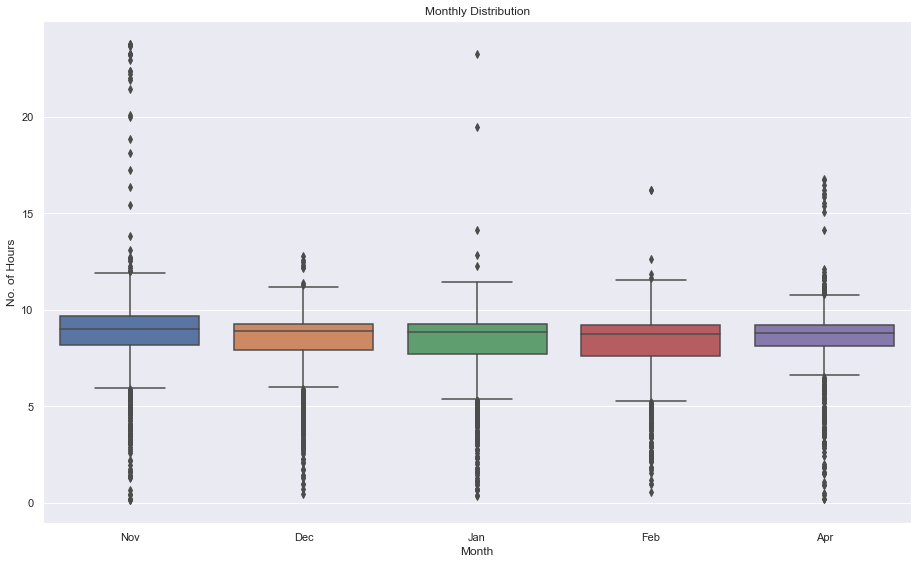

In [30]:
plt.figure(figsize=(13,8))
sns.boxplot(x='Month',y='Hours',data=df.dropna(how='any'))
plt.xlabel('Month')
plt.ylabel('No. of Hours')
plt.title('Monthly Distribution')
plt.tight_layout()
plt.show()

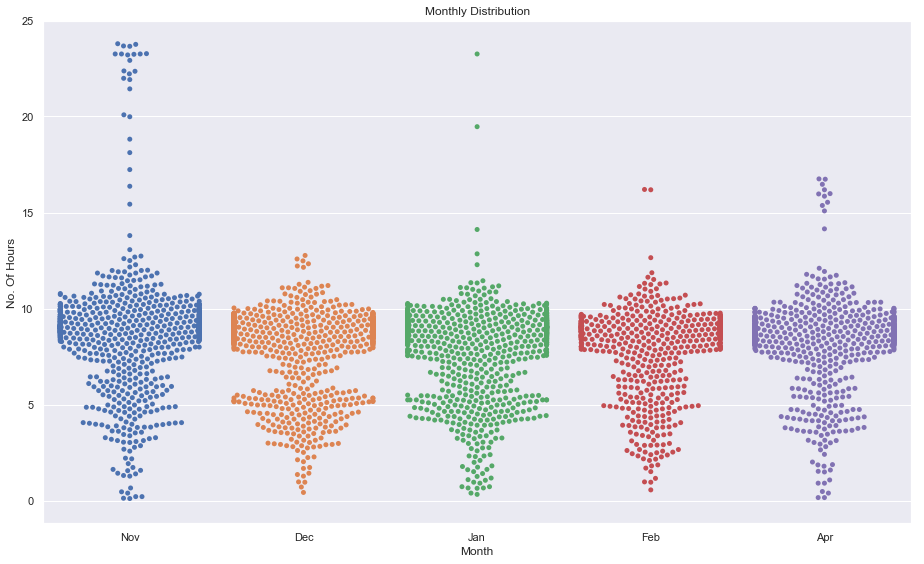

In [37]:
plt.figure(figsize=(13,8))
sns.swarmplot(x='Month',y='Hours',data=df.dropna(how='any'))
plt.xlabel('Month')
plt.ylabel('No. Of Hours')
plt.title('Monthly Distribution')
plt.tight_layout()
plt.show()

In [47]:
df[df.Status=='A'].pivot_table(index='Name', columns='Month',values='Status',aggfunc='count').tail(10)

Month,Apr,Dec,Feb,Jan,Nov
Name,,,,,
Sujay W,4.0,23.0,12.0,9.0,30.0
Suraksha,9.0,NaN,NaN,NaN,NaN
Swati Johari,20.0,10.0,10.0,9.0,4.0
Syed Sidd,7.0,31.0,20.0,31.0,30.0
Ullas C,6.0,6.0,9.0,10.0,12.0
Uzma,30.0,13.0,12.0,9.0,12.0
Velu D,10.0,12.0,12.0,12.0,11.0
Vibhishan,4.0,14.0,9.0,12.0,7.0
Vimal Venugopal,7.0,14.0,10.0,6.0,30.0


In [19]:
November = pd.read_excel(r"C:\Users\Santosh\Desktop\November.xlsx",index=False)
print(November.head(4))

            Name   Day Status InTime OutTime  Total     Hours Month  \
0  Ratheesh Tech  1 Th      A    NaN     NaN  00:00       NaN   Nov   
1  Ratheesh Tech   2 F      P  10:18   10:31  00:13  0.216667   Nov   
2  Ratheesh Tech  3 St      A    NaN     NaN  00:00       NaN   Nov   
3  Ratheesh Tech   4 S      A    NaN     NaN  00:00       NaN   Nov   

        Date  EarlyHours  
0 2018-11-01         NaN  
1 2018-11-02         2.3  
2 2018-11-03         NaN  
3 2018-11-04         NaN  


In [54]:
# Stdev, Variance are a good metric to understand how wide the data is spread around the mean.
# Standard Deviation is a variable, which describes how wide the data is spread in it's distribution.
stdev = np.std(df['Hours'])
print(stdev)
variance = np.var(df['Hours'])
print(variance)

2.5771226423297455
6.64156111360865


In [51]:
# Pearson Correlation Coefficient helps to understand the relationship between 2 variables,stands always between -1 to 1.
def pearson_r(x,y):
    corr_mat = np.corrcoef(x,y)
    return corr_mat[0,1]
novem = November.dropna(how='any')
pcc = pearson_r(novem['EarlyHours'],novem['Hours'])
print(pcc)

-0.44320194225038534


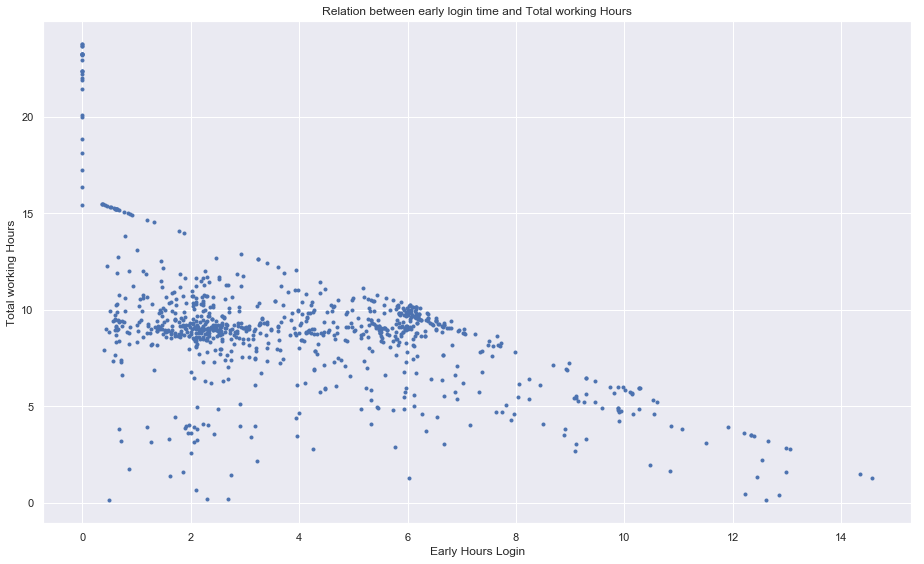

In [56]:
# Scatter plot helps to analyse the relationship between variables, 
plt.figure(figsize=(13,8))
x = November['EarlyHours'].dropna(how='any')
y= November['Hours'].dropna(how='any')
plt.plot(x,y, marker='.', linestyle='None')
plt.xlabel('Early Hours Login')
plt.ylabel('Total working Hours')
plt.title('Relation between early login time and Total working Hours')
plt.tight_layout()
plt.show()

In [57]:
November.head()

,Name,Day,Status,InTime,OutTime,Total,Hours,Month,Date,EarlyHours
0,Ratheesh Tech,1 Th,A,NaN,NaN,00:00,NaN,Nov,2018-11-01,NaN
1,Ratheesh Tech,2 F,P,10:18,10:31,00:13,0.216667,Nov,2018-11-02,2.3
2,Ratheesh Tech,3 St,A,NaN,NaN,00:00,NaN,Nov,2018-11-03,NaN
3,Ratheesh Tech,4 S,A,NaN,NaN,00:00,NaN,Nov,2018-11-04,NaN
4,Ratheesh Tech,5 M,P,10:06,18:09,8:03,8.050000,Nov,2018-11-05,2.1


In [58]:
November.describe()

,Hours,EarlyHours
count,907.000000,907.000000
mean,8.933829,4.028574
std,3.227525,2.709934
min,0.116667,0.000000
25%,8.150000,2.050000
50%,9.016667,3.316667
75%,9.833333,5.916667
max,23.783333,14.566667


In [77]:
monthly = df[df.Status=='P'].dropna(how='any')
present = monthly.pivot_table(index=['Month'], values=['Hours'], aggfunc=('sum','mean','median','count'))
print(present)

      Hours                                 
      count      mean    median          sum
Month                                       
Apr     802  8.381525  8.783333  6721.983333
Dec     958  8.114388  8.916667  7773.583333
Feb     661  8.012632  8.750000  5296.350000
Jan    1035  8.105056  8.833333  8388.733333
Nov     840  8.808373  8.983333  7399.033333


<Figure size 720x432 with 0 Axes>

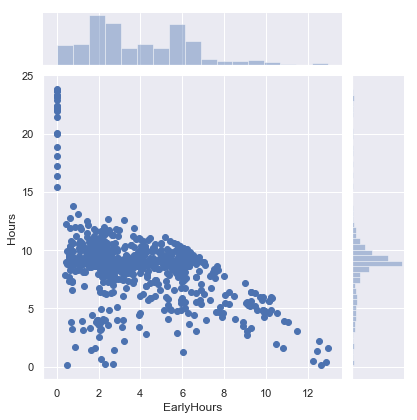

In [75]:
# To find the relationship between 2 variables, displays scatter plot for 2 variables and Histograms for each variable.
plt.figure(figsize=(10,6))
sns.jointplot(x='EarlyHours',y='Hours',data=November.dropna(how='any'))
plt.show()

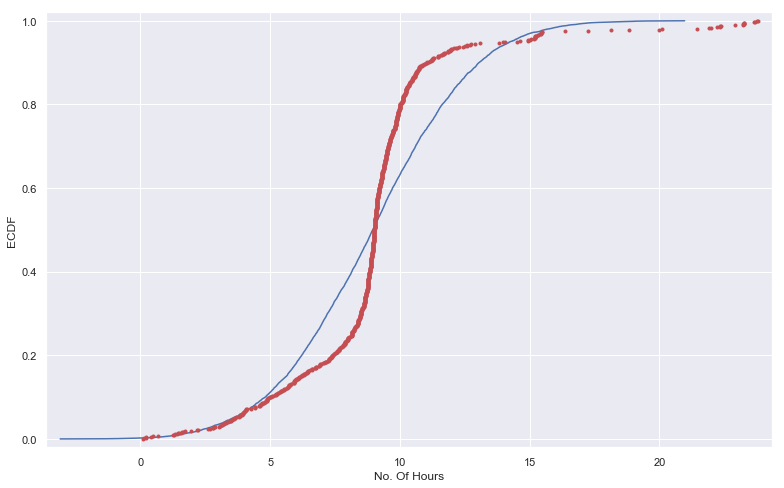

In [80]:
# Employees working for n no. of hours(continuous variable) per day is Normal'ly distributed. 
plt.figure(figsize=(13,8))
from random import random
x = np.sort(November['Hours'].dropna(how='any'))
y = np.arange(1, len(x)+1) / len(x)

mean = November['Hours'].dropna(how='any').mean()
stdev = November['Hours'].dropna(how='any').std()

samples = np.random.normal(mean,stdev, size=10000)
x_theor = np.sort(samples)
y_theor = np.arange(1, len(samples)+1) / len(samples)

plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none',color='r')
plt.xlabel('No. Of Hours')
plt.ylabel('ECDF')
plt.margins(0.02)
plt.show()

In [28]:
November.head(4)

,Name,Day,Status,InTime,OutTime,Total,Hours,Month,Date,EarlyHours
0,Ratheesh Tech,1 Th,A,NaN,NaN,00:00,NaN,Nov,2018-11-01,NaN
1,Ratheesh Tech,2 F,P,10:18,10:31,00:13,0.216667,Nov,2018-11-02,2.3
2,Ratheesh Tech,3 St,A,NaN,NaN,00:00,NaN,Nov,2018-11-03,NaN
3,Ratheesh Tech,4 S,A,NaN,NaN,00:00,NaN,Nov,2018-11-04,NaN


In [ ]:
#monthly = df.pivot_table(index=['Month'], values=['Hours'], aggfunc='sum')
#print(monthly)
#summary = df.groupby(['Month']).agg(['count','mean','median'])
#print(summary)

In [ ]:
#create multiple subplots of histograms for all months to analyse and compare the distribution
plt.figure(figsize=(13,8))
sns.set()

dfrows = df.Month == "Nov"
dfcolumns = ["Hours"]
November = df.loc[dfrows, dfcolumns]

#plt.subplot(1,2,1)
plt.hist(x=November, bins=[0,2,4,6,8,9,10,11,12,14,16])
plt.xlabel('Total No. of Hours')
plt.ylabel('No. of Employees')
plt.title('November')


plt.tight_layout()
plt.show()

In [44]:
df2 = df[df.Status == 'P']
print(df2.head(5))

             Name   Day Status InTime OutTime  Total     Hours Month  \
1   Ratheesh Tech   2 F      P  10:18   10:31  00:13  0.216667   Nov   
4   Ratheesh Tech   5 M      P  10:06   18:09   8:03  8.050000   Nov   
5   Ratheesh Tech   6 T      P  10:44   12:10   1:26  1.433333   Nov   
8   Ratheesh Tech   9 F      P  10:41   17:04   6:23  6.383333   Nov   
11  Ratheesh Tech  12 M      P  10:44   18:10   7:25  7.416667   Nov   

         Date  
1  2018-11-02  
4  2018-11-05  
5  2018-11-06  
8  2018-11-09  
11 2018-11-12  


In [53]:
# Pearson Correlation Coefficient helps to understand the relationship between 2 variables,stands always between -1 to 1.
from scipy.stats.stats import pearsonr
x = November['EarlyHours'].dropna(how='any')
y = November['Hours'].dropna(how='any')
pcc = pearsonr(x, y)
# pcc = pearsonr(November['EarlyHours'],November['Hours'])
print(pcc)

(-0.5054788420895062, 5.430598419726764e-60)


In [ ]:
# To drop un-named columns.
#November.drop(['Unnamed: 10','Unnamed: 11'], axis=1)